In [6]:
import requests
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

In [2]:
# overpass QL: all buildings within 2000m of Nairobi center
query = """
[out:json][timeout:25];
(
  way["building"](around:2000, -1.286389, 36.817223);
);
out body;
>;
out skel qt;
"""

url = "http://overpass-api.de/api/interpreter"
response = requests.get(url, params={'data': query})
if response.status_code == 200:
    data = response.json()
    print("Data retrieved successfully.")

Data retrieved successfully.


In [4]:
type(data)

dict

In [5]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.62.5 1bd436f1',
 'osm3s': {'timestamp_osm_base': '2025-04-13T16:44:00Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'way',
   'id': 40925985,
   'nodes': [498413255,
    498413259,
    498413261,
    498413265,
    498413268,
    498413270,
    498413255],
   'tags': {'addr:city': 'Nairobi',
    'addr:street': 'City Hall Way',
    'brand': 'InterContinental',
    'brand:wikidata': 'Q1825730',
    'building': 'yes',
    'building:levels': '10',
    'internet_access': 'yes',
    'name': 'InterContinental Hotel',
    'stars': '5',
    'tourism': 'hotel',
    'wheelchair': 'yes'}},
  {'type': 'way',
   'id': 77398772,
   'nodes': [911044042, 911044047, 911044041, 911044038, 911044042],
   'tags': {'addr:city': 'Nairobi',
    'addr:street': 'Ralph Bunche Road',
    'building': 'commercial',
    'name': 'Upper Hill Medical Centre'}},
  {'typ

In [8]:
# Extract node and ways
elements = data['elements']

In [13]:
elements[3]

{'type': 'way',
 'id': 79418234,
 'nodes': [927178939,
  12066419299,
  927178943,
  927178941,
  10189078661,
  10189078658,
  10189078659,
  10189078660,
  10189078657,
  10189078654,
  10189078655,
  10189078656,
  927178939],
 'tags': {'building': 'yes',
  'name': 'Graduation Square Pavilion',
  'operator': 'University of Nairobi'}}

In [14]:
# Step 1: Build a dictionary of node id -> coordinates
nodes = {}
for element in elements:
    if element['type'] == 'node':
        nodes[element['id']] = (element['lat'], element['lon'])
# Step 2: Get all building ways (list of node references)
features = []
for el in elements:
    if el['type'] == 'way' and 'nodes' in el:
        try:
            coords = [nodes[node_id] for node_id in el['nodes']]
            if coords[0] != coords[-1]:  # Make sure it's a closed ring
                coords.append(coords[0])
            polygon = Polygon(coords)
            tags = el.get('tags', {})
            features.append({
                'geometry': polygon,
                'building': tags.get('building', 'yes'),
                'id': el['id']
            })
        except KeyError:
            # Incomplete geometry — skip
            continue


In [16]:
nodes

{1576448569: (-1.2957926, 36.8036391),
 1576448570: (-1.2958223, 36.8031606),
 1576448571: (-1.2960351, 36.8031686),
 1576448572: (-1.2960161, 36.8036721),
 2477128195: (-1.2945816, 36.8019538),
 2477128197: (-1.2945371, 36.8022401),
 2477128198: (-1.2948543, 36.8022635),
 2477128199: (-1.2948576, 36.8019742),
 3011886492: (-1.2954353, 36.801821),
 3011886493: (-1.2954345, 36.801895),
 3011886494: (-1.295568, 36.8018963),
 3011886495: (-1.2955688, 36.8018224),
 3011886501: (-1.2956634, 36.8019171),
 3011886502: (-1.2957942, 36.8020738),
 5401775734: (-1.2970862, 36.8038413),
 5401775735: (-1.2975892, 36.8038606),
 5401775736: (-1.2975718, 36.8041954),
 5401775737: (-1.2970757, 36.8041167),
 5401775738: (-1.2972089, 36.8039899),
 5401775739: (-1.2972039, 36.8041217),
 5426483275: (-1.2944175, 36.8022046),
 5426483276: (-1.2944463, 36.8023639),
 5426483277: (-1.2945752, 36.8023406),
 5426483278: (-1.2945926, 36.8024369),
 5426483279: (-1.2943645, 36.8024782),
 6330660353: (-1.2961195, 36

In [17]:
features

[{'geometry': <POLYGON ((-1.288 36.819, -1.288 36.819, -1.288 36.82, -1.287 36.819, -1.288...>,
  'building': 'yes',
  'id': 40925985},
 {'geometry': <POLYGON ((-1.295 36.807, -1.294 36.807, -1.295 36.807, -1.295 36.807, -1.29...>,
  'building': 'commercial',
  'id': 77398772},
 {'geometry': <POLYGON ((-1.285 36.826, -1.285 36.826, -1.285 36.826, -1.285 36.826, -1.28...>,
  'building': 'yes',
  'id': 78308386},
 {'geometry': <POLYGON ((-1.277 36.812, -1.277 36.812, -1.278 36.812, -1.278 36.812, -1.27...>,
  'building': 'yes',
  'id': 79418234},
 {'geometry': <POLYGON ((-1.279 36.816, -1.28 36.816, -1.28 36.816, -1.28 36.816, -1.279 3...>,
  'building': 'university',
  'id': 79418479},
 {'geometry': <POLYGON ((-1.28 36.815, -1.28 36.816, -1.28 36.816, -1.28 36.816, -1.28 36....>,
  'building': 'yes',
  'id': 79418528},
 {'geometry': <POLYGON ((-1.28 36.815, -1.28 36.815, -1.28 36.815, -1.28 36.815, -1.28 36....>,
  'building': 'yes',
  'id': 79418625},
 {'geometry': <POLYGON ((-1.278 36

In [18]:
# Step 3: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(features, crs="EPSG:4326")

                                            geometry    building        id
0  POLYGON ((-1.28821 36.81887, -1.28837 36.81894...         yes  40925985
1  POLYGON ((-1.29461 36.80651, -1.29446 36.80681...  commercial  77398772
2  POLYGON ((-1.28488 36.82571, -1.28465 36.82589...         yes  78308386
3  POLYGON ((-1.2772 36.81214, -1.27728 36.8122, ...         yes  79418234
4  POLYGON ((-1.27934 36.81635, -1.27986 36.8161,...  university  79418479


<Axes: >

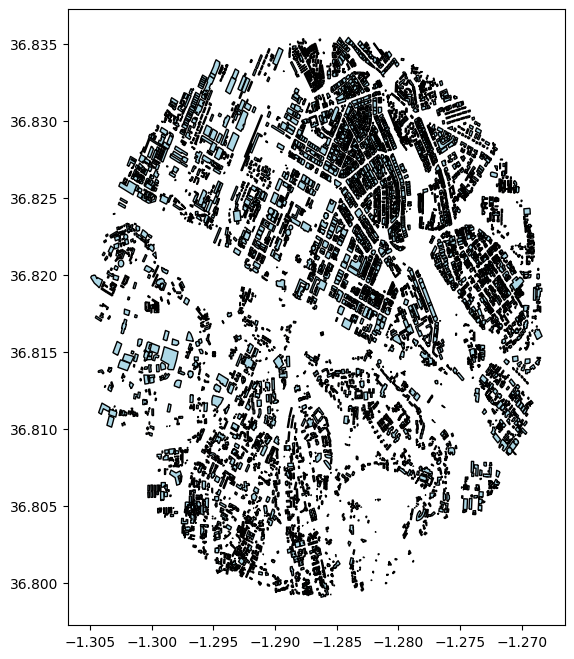

In [19]:
# Preview
print(gdf.head())
gdf.plot(figsize=(8, 8), edgecolor='black', facecolor='lightblue')

🧪 Practical Example in Overpass QL: Get Relations for Nairobi Boundary

In [21]:
# Query for Nairobi's administrative boundary relation
query = """
[out:json][timeout:25];
rel["boundary"="administrative"]["name"="Nairobi"];
out body;
>;
out skel qt;
"""

url = "https://overpass-api.de/api/interpreter"
response = requests.get(url, params={'data': query})
data = response.json()

# Just show the type and tags of the relation
for el in data['elements']:
    if el['type'] == 'relation':
        print("🧾 Relation Tags:")
        for k, v in el['tags'].items():
            print(f"{k}: {v}")

🧾 Relation Tags:
CONSTITUEN: KAMUKUNJI
CONST_CODE: 288
COUNTY_COD: 47
COUNTY_NAM: NAIROBI
ID_: 5543
ISO3166-2: KE-30
OBJECTID: 1
Shape_Area: 0.057422949
Shape_Leng: 1.55978672217
admin_level: 4
alt_name:ko: 나이로비현
boundary: administrative
name: Nairobi
name:ceb: Nairobi
name:de: Nairobi County
name:en: Nairobi County
name:es: Condado de Nairobi
name:et: Nairobi maakond
name:fa: شهرستان نایروبی
name:fi: Nairobin piirikunta
name:fr: Comté de Nairobi
name:id: County Nairobi
name:it: Contea di Nairobi
name:ja: ナイロビ
name:ko: 나이로비
name:nan: Nairobi Kūn
name:nl: Nairobi County
name:no: Nairobi fylke
name:pl: Nairobi
name:sw: Kaunti ya Nairobi
name:ur: نیروبی کاؤنٹی
name:vi: Nairobi
name:wuu: 内罗毕郡
name:yue: 奈洛比郡
name:zh: 内罗毕郡
name:zh-Hans: 内罗毕郡
name:zh-Hant: 內羅畢郡
name:zu: Nairobi County
type: boundary
wikidata: Q3335223
🧾 Relation Tags:
admin_level: 3
boundary: administrative
name: Nairobi
name:azb: نایروبی
name:be: Найробі
name:be-tarask: Найробі
name:de: Nairobi
name:es: Nairobi
name:fr: Nair